In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/sanitized/Masterdata.csv')

In [3]:
age_df = df[df.Categorization=='Age']

In [4]:
age_ranges = age_df.Category.unique()

In [5]:
age_df['NW_mean/US_GDP'] = age_df['Net_Worth_mean']/age_df['US_GDP']
age_df['NW_median/US_GDP'] = age_df['Net_Worth_median']/age_df['US_GDP']
age_df['NW_mean/World_GDP'] = age_df['Net_Worth_mean']/age_df['World_GDP']
age_df['NW_median/World_GDP'] = age_df['Net_Worth_median']/age_df['World_GDP']

/tmp/ipykernel_388/64699038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['NW_mean/US_GDP'] = age_df['Net_Worth_mean']/age_df['US_GDP']
/tmp/ipykernel_388/64699038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['NW_median/US_GDP'] = age_df['Net_Worth_median']/age_df['US_GDP']
/tmp/ipykernel_388/64699038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [6]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style="whitegrid")
def make_line_plot(y_val, dataset):
    sns.lineplot(x='year',y=y_val, data=dataset, hue='Category')
    sns.despine()
    plt.show()

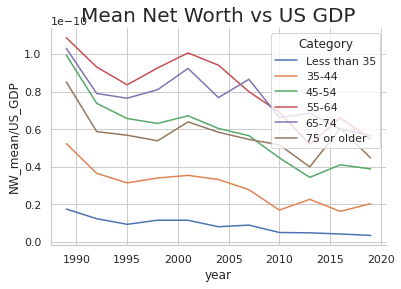

In [7]:
plt.title('Mean Net Worth vs US GDP', fontdict={'fontsize':20})
make_line_plot('NW_mean/US_GDP', age_df)

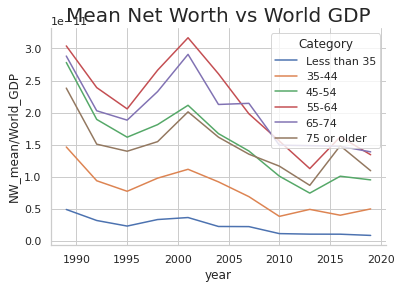

In [8]:
plt.title('Mean Net Worth vs World GDP', fontdict={'fontsize':20})
make_line_plot('NW_mean/World_GDP', age_df)

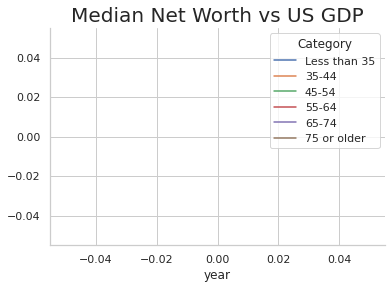

In [9]:
plt.title('Median Net Worth vs US GDP', fontdict={'fontsize':20})
make_line_plot('NW_median/US_GDP', age_df)

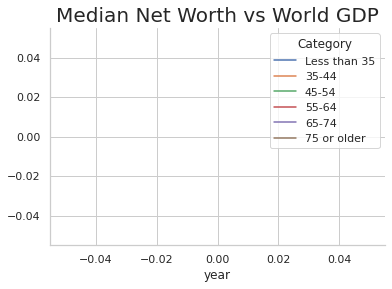

In [10]:
plt.title('Median Net Worth vs World GDP', fontdict={'fontsize':20})
make_line_plot('NW_median/World_GDP', age_df)

In [11]:
subs = [30, 40, 50, 60, 70, 80]

def assign_generation(year_val):
    if year_val<=1927:
        return 'Greatest'
    elif year_val>=1928 and year_val<1946:
        return 'Silent'
    elif year_val>=1946 and year_val<1965:
        return 'Boomers'
    elif year_val>=1965 and year_val<=1980:
        return 'Gen X'
    elif year_val>1980 and year_val<=1996:
        return 'Millenials'
    elif year_val>1996 and year_val<=2012:
        return 'Gen Z'

In [12]:
u_years = list(age_df.year.unique())
u_years

[1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019]

In [13]:
final_age_df = pd.DataFrame()
for year_val in u_years:
    temp_df = age_df[age_df['year']==year_val].reset_index(drop=True)
    temp_df['Generation'] = None
    for i in range(0,6):
        temp_df.at[i, 'Generation'] = assign_generation(year_val-subs[i])
    final_age_df = pd.concat([final_age_df, temp_df], axis=0, ignore_index=True)

In [14]:
first_column = final_age_df.pop('Generation')
final_age_df.insert(2, 'Generation', first_column)

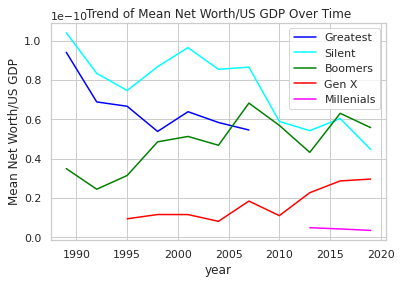

In [15]:
greatest_df = final_age_df[final_age_df['Generation']=='Greatest']
greatest_df.groupby('year')['NW_mean/US_GDP'].mean().plot(color='blue')

silent_df = final_age_df[final_age_df['Generation']=='Silent']
silent_df.groupby('year')['NW_mean/US_GDP'].mean().plot(color='cyan')

boomer_df = final_age_df[final_age_df['Generation']=='Boomers']
boomer_df.groupby('year')['NW_mean/US_GDP'].mean().plot(color='green')

genx_df = final_age_df[final_age_df['Generation']=='Gen X']
genx_df.groupby('year')['NW_mean/US_GDP'].mean().plot(color='red')

millenials_df = final_age_df[final_age_df['Generation']=='Millenials']
millenials_df.groupby('year')['NW_mean/US_GDP'].mean().plot(color='magenta')
plt.ylabel('Mean Net Worth/US GDP')
plt.legend(['Greatest', 'Silent', 'Boomers', 'Gen X', 'Millenials'])
plt.title('Trend of Mean Net Worth/US GDP Over Time')
plt.show()

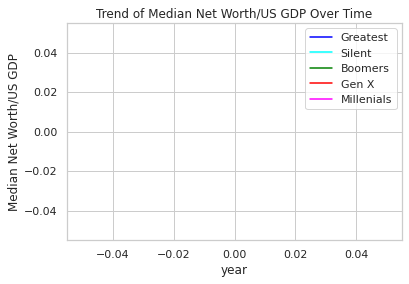

In [16]:
greatest_df = final_age_df[final_age_df['Generation']=='Greatest']
greatest_df.groupby('year')['NW_median/US_GDP'].mean().plot(color='blue')

silent_df = final_age_df[final_age_df['Generation']=='Silent']
silent_df.groupby('year')['NW_median/US_GDP'].mean().plot(color='cyan')

boomer_df = final_age_df[final_age_df['Generation']=='Boomers']
boomer_df.groupby('year')['NW_median/US_GDP'].mean().plot(color='green')

genx_df = final_age_df[final_age_df['Generation']=='Gen X']
genx_df.groupby('year')['NW_median/US_GDP'].mean().plot(color='red')

millenials_df = final_age_df[final_age_df['Generation']=='Millenials']
millenials_df.groupby('year')['NW_median/US_GDP'].mean().plot(color='magenta')

plt.ylabel('Median Net Worth/US GDP')
plt.legend(['Greatest', 'Silent', 'Boomers', 'Gen X', 'Millenials'])
plt.title('Trend of Median Net Worth/US GDP Over Time')
plt.show()

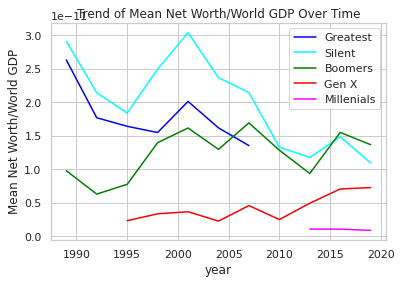

In [17]:
greatest_df = final_age_df[final_age_df['Generation']=='Greatest']
greatest_df.groupby('year')['NW_mean/World_GDP'].mean().plot(color='blue')

silent_df = final_age_df[final_age_df['Generation']=='Silent']
silent_df.groupby('year')['NW_mean/World_GDP'].mean().plot(color='cyan')

boomer_df = final_age_df[final_age_df['Generation']=='Boomers']
boomer_df.groupby('year')['NW_mean/World_GDP'].mean().plot(color='green')

genx_df = final_age_df[final_age_df['Generation']=='Gen X']
genx_df.groupby('year')['NW_mean/World_GDP'].mean().plot(color='red')

millenials_df = final_age_df[final_age_df['Generation']=='Millenials']
millenials_df.groupby('year')['NW_mean/World_GDP'].mean().plot(color='magenta')

plt.ylabel('Mean Net Worth/World GDP')
plt.legend(['Greatest', 'Silent', 'Boomers', 'Gen X', 'Millenials'])
plt.title('Trend of Mean Net Worth/World GDP Over Time')
plt.show()

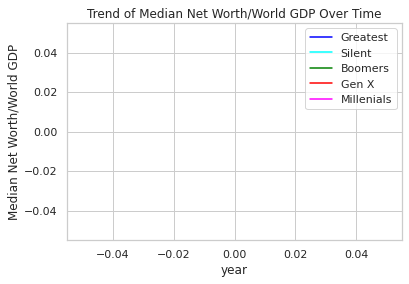

In [18]:
greatest_df = final_age_df[final_age_df['Generation']=='Greatest']
greatest_df.groupby('year')['NW_median/World_GDP'].mean().plot(color='blue')

silent_df = final_age_df[final_age_df['Generation']=='Silent']
silent_df.groupby('year')['NW_median/World_GDP'].mean().plot(color='cyan')

boomer_df = final_age_df[final_age_df['Generation']=='Boomers']
boomer_df.groupby('year')['NW_median/World_GDP'].mean().plot(color='green')

genx_df = final_age_df[final_age_df['Generation']=='Gen X']
genx_df.groupby('year')['NW_median/World_GDP'].mean().plot(color='red')

millenials_df = final_age_df[final_age_df['Generation']=='Millenials']
millenials_df.groupby('year')['NW_median/World_GDP'].mean().plot(color='magenta')

plt.ylabel('Median Net Worth/World GDP')
plt.legend(['Greatest', 'Silent', 'Boomers', 'Gen X', 'Millenials'])
plt.title('Trend of Median Net Worth/World GDP Over Time')
plt.show()

In [19]:
nwp_df = df[df.Categorization=='Net Worth Percentile']
nwp_df['NW_mean/US_GDP'] = nwp_df['Net_Worth_mean']/nwp_df['US_GDP']
nwp_df['NW_median/US_GDP'] = nwp_df['Net_Worth_median']/nwp_df['US_GDP']
nwp_df['NW_mean/World_GDP'] = nwp_df['Net_Worth_mean']/nwp_df['World_GDP']
nwp_df['NW_median/World_GDP'] = nwp_df['Net_Worth_median']/nwp_df['World_GDP']

/tmp/ipykernel_388/3494381285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwp_df['NW_mean/US_GDP'] = nwp_df['Net_Worth_mean']/nwp_df['US_GDP']
/tmp/ipykernel_388/3494381285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwp_df['NW_median/US_GDP'] = nwp_df['Net_Worth_median']/nwp_df['US_GDP']
/tmp/ipykernel_388/3494381285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

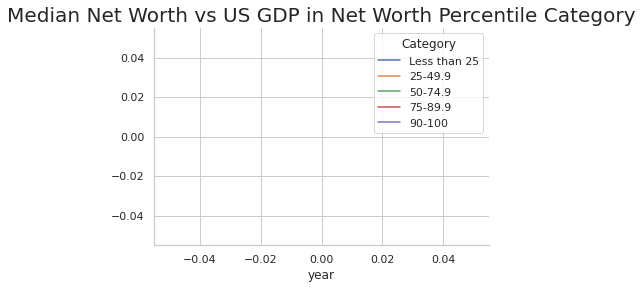

In [20]:
plt.title('Median Net Worth vs US GDP in Net Worth Percentile Category', fontdict={'fontsize':20})
make_line_plot('NW_median/US_GDP', nwp_df)

In [21]:
ip_df = df[df.Categorization=='Income Percentile']
ip_df['NW_mean/US_GDP'] = ip_df['Net_Worth_mean']/ip_df['US_GDP']
ip_df['NW_median/US_GDP'] = ip_df['Net_Worth_median']/ip_df['US_GDP']
ip_df['NW_mean/World_GDP'] = ip_df['Net_Worth_mean']/ip_df['World_GDP']
ip_df['NW_median/World_GDP'] = ip_df['Net_Worth_median']/ip_df['World_GDP']

/tmp/ipykernel_388/3522537975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_df['NW_mean/US_GDP'] = ip_df['Net_Worth_mean']/ip_df['US_GDP']
/tmp/ipykernel_388/3522537975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip_df['NW_median/US_GDP'] = ip_df['Net_Worth_median']/ip_df['US_GDP']
/tmp/ipykernel_388/3522537975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

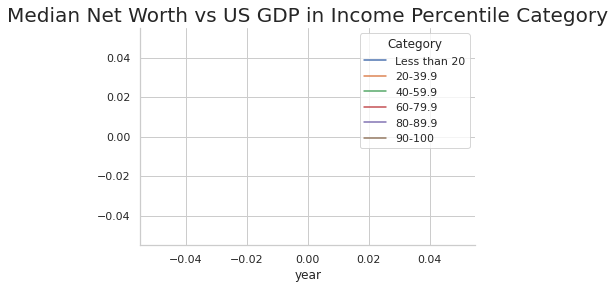

In [22]:
plt.title('Median Net Worth vs US GDP in Income Percentile Category', fontdict={'fontsize':20})
make_line_plot('NW_median/US_GDP', ip_df)